Import packages

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Read The Data

Goal is to Segment Healthy food 

In [13]:
pd.set_option("display.max_column",None)
df = pd.read_csv("fastfood.csv")
df.head(3)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other


In [70]:
df.head()

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,labels
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,2
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,1
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,67,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,1
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,1


In [14]:
df.shape

(515, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


Ckecking Null Values

In [44]:
null_vals = dict(df.isnull().sum())
null_vals

{'restaurant': 0,
 'item': 0,
 'calories': 0,
 'total_fat': 0,
 'cholesterol': 0,
 'sodium': 0,
 'total_carb': 0,
 'fiber': 0,
 'sugar': 0,
 'protein': 0,
 'vit_a': 0,
 'vit_c': 0,
 'calcium': 0,
 'labels': 0}

In [16]:
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [17]:
# replace vitamin a ,c and calcium with mean value, for this collecting mean values for these columns
null_cols = ['fiber','protein','vit_a','vit_c','calcium']
null_cols_avg = {}
for col in null_cols:
    null_cols_avg[col] = df[col].describe().mean()
null_cols_avg

{'fiber': 67.14682965168379,
 'protein': 102.8843714070368,
 'vit_a': 70.6551841488183,
 'vit_c': 99.97034180718309,
 'calcium': 87.92181644364442}

In [18]:
df.fillna(value=null_cols_avg,inplace=True)
df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [21]:
df.drop(['salad','cal_fat','sat_fat','trans_fat'],axis=1,inplace=True)

In [22]:
df_seg = df.drop(['restaurant','item'],axis='columns')
df_seg.sample(3)

,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
254,340,21,45,1200,21,1.0,1,16.0,70.655184,99.970342,87.921816
398,790,32,60,1350,96,4.0,8,38.0,30.000000,4.000000,60.000000
121,1080,51,75,2390,118,8.0,9,37.0,1.000000,7.000000,13.000000


In [25]:
inertias = []
for i in range(1,10):
    model = KMeans(n_clusters=i,init="k-means++",random_state=42)
    model.fit(df_seg)
    inertias.append(model.inertia_)
print(inertias)

c:\Users\BHOOMIKA C S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\BHOOMIKA C S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\BHOOMIKA C S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\BHOOMIKA C S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

[290868806.76346713, 132193797.64424579, 78198573.19120206, 53774068.03445704, 42600515.18340419, 33421568.18818365, 29336001.229746997, 26188869.210913755, 23121253.103140853]


ELBOW Method

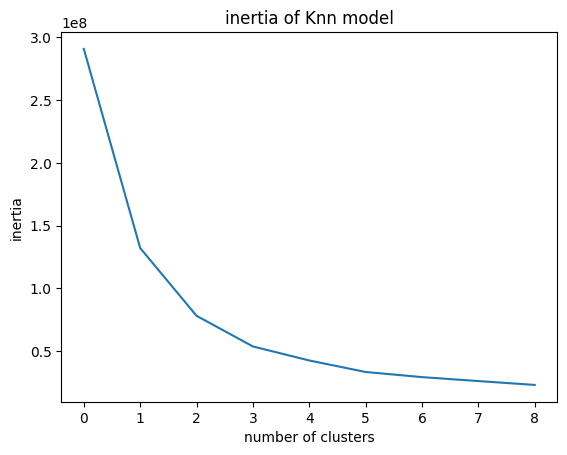

In [26]:
plt.plot(inertias)
plt.title("inertia of Knn model")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

As per elbow method 4 types of clusters are best for our model, that means we can classify foods into 3 types.

In [28]:
model = KMeans(n_clusters=4,init='k-means++',random_state=42)
model.fit(df_seg)

c:\Users\BHOOMIKA C S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [29]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[3.03939394e+02, 1.43838384e+01, 3.88383838e+01, 6.70909091e+02,
        2.78939394e+01, 3.36437793e+00, 4.13636364e+00, 1.61666667e+01,
        4.29526351e+01, 5.53148018e+01, 4.78331489e+01],
       [8.11122449e+02, 4.21530612e+01, 1.22244898e+02, 1.97316327e+03,
        6.71734694e+01, 1.04507616e+01, 1.13877551e+01, 4.36416773e+01,
        4.03585558e+01, 6.16391400e+01, 6.40959547e+01],
       [5.57711443e+02, 2.78109453e+01, 7.09203980e+01, 1.25681592e+03,
        4.89950249e+01, 5.35542532e+00, 7.73631841e+00, 2.81542289e+01,
        3.93822311e+01, 4.68850461e+01, 4.72808406e+01],
       [1.20277778e+03, 6.25000000e+01, 1.88333333e+02, 3.51333333e+03,
        8.68333333e+01, 6.66666667e+00, 1.38888889e+01, 7.23333333e+01,
        2.33678187e+01, 4.04950570e+01, 4.37647472e+01]])

In [30]:
labels = model.labels_
labels[:10]

array([2, 1, 1, 1, 1, 2, 0, 2, 2, 2])

In [31]:
df['labels'] = labels
df.sample(3)

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,labels
145,Arbys,Buttermilk Chicken Bacon & Swiss,650,31,90,1750,56,2.0,9,39.0,70.655184,99.970342,87.921816,1
481,Taco Bell,Beefy Cheddar Crunchwrap Slider,410,19,25,960,46,4.0,3,14.0,70.655184,99.970342,87.921816,0
308,Subway,"6"" Big Hot Pastrami",580,31,85,1470,47,5.0,7,29.0,10.000000,45.000000,40.000000,2


Segmenting data into Healthy food and Unhealthy food

In [32]:
import seaborn as sn

Droping cal_fat and sat_fat we will consider only total fat for further computatio

In [33]:
label_0 = df[df['labels']==0]
label_1 = df[df['labels']==1]
label_2 = df[df['labels']==2]
label_3 = df[df['labels']==3]
print("label 0",len(label_0))
print("label 1",len(label_1))
print("label 2",len(label_2))
print("label 3",len(label_3))

label 0 198
label 1 98
label 2 201
label 3 18


Average Nutrition

In [34]:
nutritions = list(label_0.describe().columns)
label_0_nutri_avg = label_0.describe().mean().values
label_1_nutri_avg = label_1.describe().mean().values
label_2_nutri_avg = label_2.describe().mean().values
label_3_nutri_avg = label_3.describe().mean().values

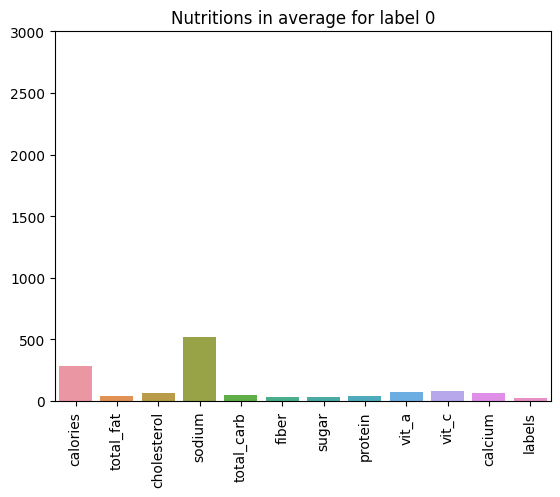

In [35]:
# label 0
sn.barplot(x=nutritions,y=label_0_nutri_avg)
plt.title("Nutritions in average for label 0")
plt.xticks(rotation=90)
plt.ylim([0,3000])
plt.show()

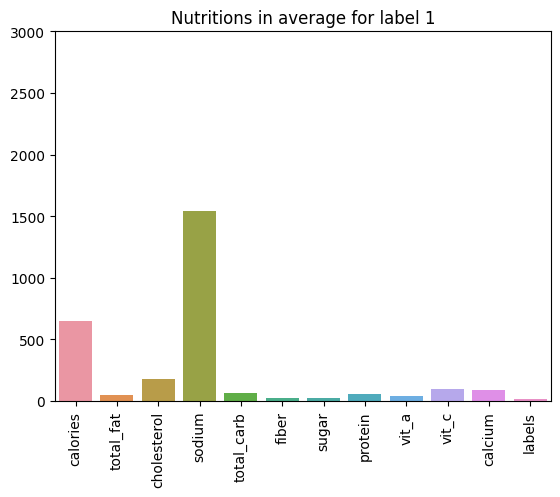

In [36]:
# label 1
sn.barplot(x=nutritions,y=label_1_nutri_avg)
plt.title("Nutritions in average for label 1")
plt.xticks(rotation=90)
plt.ylim([0,3000])
plt.show()

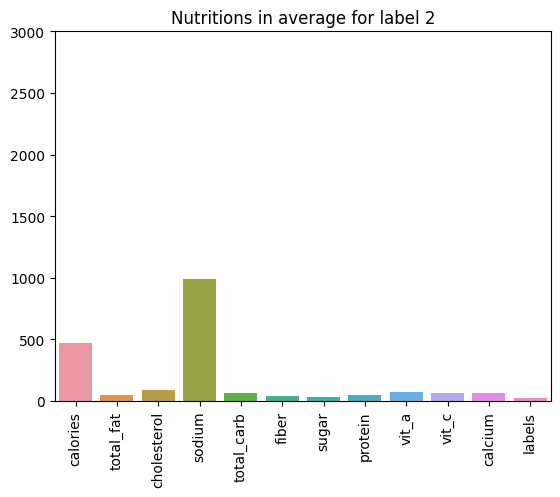

In [37]:
# label 2
sn.barplot(x=nutritions,y=label_2_nutri_avg)
plt.title("Nutritions in average for label 2")
plt.xticks(rotation=90)
plt.ylim([0,3000])
plt.show()

Seperate Positive Nutrition amd Negative Nutrition

In [38]:
positive_ntr = ['protein','calcium','total_carb','vit_a','vit_c','fiber']
negative_ntr = ['sugar','calories','total_fat','sodium','cholesterol']

In [56]:
def zipper(lis1,lis2):
    temp = {}
    for v1,v2 in zip(lis1,lis2):
        temp[v1] = v2
    return temp

label_0_dic = zipper(nutritions,label_0_nutri_avg)
label_1_dic = zipper(nutritions,label_1_nutri_avg)
label_2_dic = zipper(nutritions,label_2_nutri_avg)
label_3_dic = zipper(nutritions,label_3_nutri_avg)

print("label_0_zipped",label_0_dic)
print("\n\nlabel_1_zipped",label_1_dic)
print("\n\nlabel_2_zipped",label_2_dic)
print("\n\nlabel_3_zipped",label_3_dic)

label_0_zipped {'calories': 284.565853125518, 'total_fat': 38.8221736070514, 'cholesterol': 65.06166896101948, 'sodium': 519.3294115532656, 'total_carb': 51.3806031862152, 'fiber': 35.07344277032587, 'sugar': 29.420602585977285, 'protein': 38.32580545912687, 'vit_a': 73.26778613317569, 'vit_c': 81.79601287982078, 'calcium': 64.62109647845732, 'labels': 24.75}


label_1_zipped {'calories': 646.3528332826143, 'total_fat': 51.6346902054411, 'cholesterol': 181.2149470460958, 'sodium': 1545.5774154854275, 'total_carb': 66.69882916384057, 'fiber': 26.190064985926586, 'sugar': 25.13430568804795, 'protein': 53.712636790339644, 'vit_a': 44.282590875757165, 'vit_c': 97.96417380567384, 'calcium': 87.42972417857777, 'labels': 13.0}


label_2_zipped {'calories': 472.02917858344045, 'total_fat': 49.076707524835186, 'cholesterol': 88.87289844483453, 'sodium': 993.6679365853396, 'total_carb': 65.64652802890258, 'fiber': 36.8218924615535, 'sugar': 34.07306584697652, 'protein': 48.91445254658747, 'vit_a

In [57]:
pn_avg_label_0 = {}
pn_avg_label_1 = {}
pn_avg_label_2 = {}
pn_avg_label_3 = {}
for i in range(3):
    lis1 = []
    lis2 = []
    lis3 = []
    lis4 = []
    for pos_val in positive_ntr:
        lis1.append(label_0_dic[pos_val])
        lis2.append(label_1_dic[pos_val])
        lis3.append(label_2_dic[pos_val])
        lis4.append(label_3_dic[pos_val])
    pn_avg_label_0['pos'] = sum(lis1)/len(lis1)
    pn_avg_label_1['pos'] = sum(lis2)/len(lis2)
    pn_avg_label_2['pos'] = sum(lis3)/len(lis3)
    pn_avg_label_3['pos'] = sum(lis4)/len(lis4)
for i in range(3):
    lis1 = []
    lis2 = []
    lis3 = []
    lis4 = []
    for pos_val in negative_ntr:
        lis1.append(label_0_dic[pos_val])
        lis2.append(label_1_dic[pos_val])
        lis3.append(label_2_dic[pos_val])
        lis4.append(label_3_dic[pos_val])
    pn_avg_label_0['neg'] = sum(lis1)/len(lis1)
    pn_avg_label_1['neg'] = sum(lis2)/len(lis2)
    pn_avg_label_2['neg'] = sum(lis3)/len(lis3)
    pn_avg_label_3['neg'] = sum(lis4)/len(lis4)    

In [58]:
pos = [pn_avg_label_0['pos'],pn_avg_label_1['pos'],pn_avg_label_2['pos'],pn_avg_label_3['pos']]
neg = [pn_avg_label_0['neg'],pn_avg_label_1['neg'],pn_avg_label_2['neg'],pn_avg_label_3['neg']]

In [59]:
labels = ["label_0","label_1","label_2","label_3"]

Positive Nutrition Average

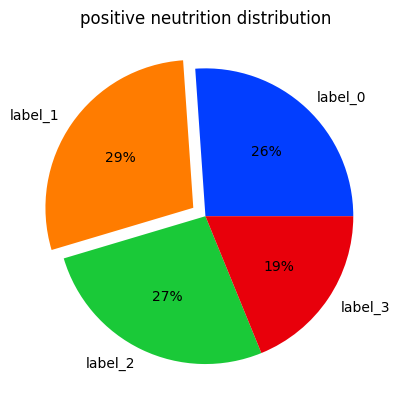

In [60]:
data = pos
  
palette_color = sn.color_palette('bright')
explode = [0,0.1,0,0]
plt.pie(data, explode = explode, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("positive neutrition distribution")
plt.show()

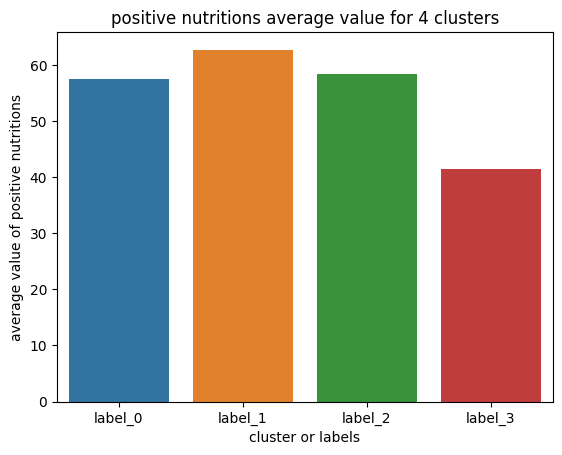

In [62]:
sn.barplot(x=labels,y=pos)
plt.title("positive nutritions average value for 4 clusters")
plt.xlabel("cluster or labels")
plt.ylabel("average value of positive nutritions")
plt.show()

Negative Nutrition Average

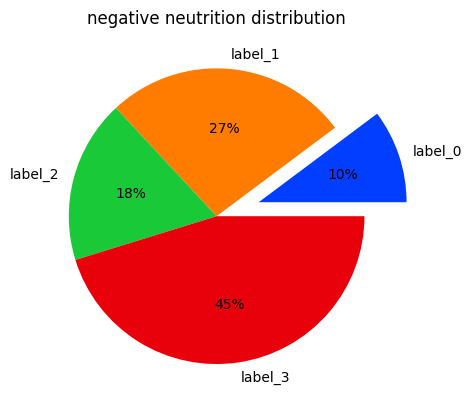

In [63]:
data = neg
  
palette_color = sn.color_palette('bright')
explode = [0.3,0,0,0]
plt.pie(data, explode=explode, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("negative neutrition distribution")
plt.show()

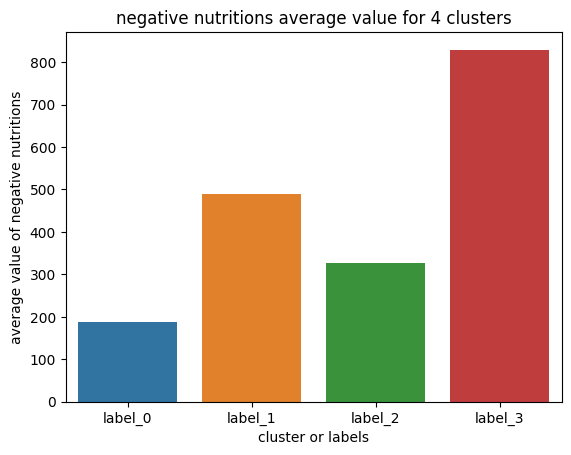

In [64]:
sn.barplot(x = labels,y=neg)
plt.title("negative nutritions average value for 4 clusters")
plt.xlabel("cluster or labels")
plt.ylabel("average value of negative nutritions")
plt.show()

Healthiest Foods

In [65]:
label_0['item'].unique()

array(['Cheeseburger', 'Filet-O-Fish®', 'Garlic White Cheddar Burger',
       'Hamburger', 'Lobster Roll', 'McChicken', 'McDouble', 'McRib',
       '3 piece Buttermilk Crispy Chicken Tenders',
       '4 Piece Chicken McNuggets', '6 Piece Chicken McNuggets',
       '10 Piece Chicken McNuggets', 'Premium Asian Salad w/o Chicken',
       'Premium Asian Salad w/ Grilled Chicken',
       'Premium Bacon Ranch Salad w/o Chicken',
       'Premium Southwest Salad w/o Chicken',
       'Chargrilled Chicken Sandwich', 'Chick-n-Slider',
       '1 Piece Chick-n-Strips', '2 Piece Chick-n-Strips',
       '3 Piece Chick-n-Strips', '4 piece Chicken Nuggets',
       '6 piece Chicken Nuggets', '8 piece Chicken Nuggets',
       '4 Piece Grilled Chicken Nuggets',
       '6 Piece Grilled Chicken Nuggets',
       '8 piece Grilled Chicken Nuggets',
       '12 Piece Grilled Chicken Nuggets',
       'Chargrilled Chicken Cool Wrap', 'Jr. Burger',
       'Jr. Chili Cheeseburger', 'Jr. Deluxe Burger',
       'Jr. D

Worst Food

In [66]:
label_3['item'].unique()

array(['10 piece Buttermilk Crispy Chicken Tenders',
       '12 piece Buttermilk Crispy Chicken Tenders',
       '20 piece Buttermilk Crispy Chicken Tenders',
       '40 piece Chicken McNuggets',
       "10 piece Sweet N' Spicy Honey BBQ Glazed Tenders",
       '30 piece Chicken Nuggets',
       'Buffalo Dunked Ultimate Chicken Sandwich',
       'Half Pound French Dip & Swiss', 'Triple Decker Sandwich',
       '4 Piece Chicken Strip Basket w/ Country Gravy',
       '6 Piece Chicken Strip Basket w/ Country Gravy',
       'Footlong Big Hot Pastrami',
       'Footlong Carved Turkey & Bacon w/ Cheese',
       'Footlong Corned Beef Reuben', 'Footlong Italian Hero',
       'Footlong Spicy Italian',
       'Footlong Turkey Italiano Melt (with Provolone)',
       'Turkey, Bacon & Guacamole Wrap'], dtype=object)

Medium Heathy food

In [68]:
label_1['item'].unique()

array(['Single Bacon Smokehouse Burger', 'Double Bacon Smokehouse Burger',
       'Grilled Bacon Smokehouse Chicken Sandwich',
       'Crispy Bacon Smokehouse Chicken Sandwich',
       'Grilled Maple Bacon Dijon Chicken Sandwich',
       'Crispy Maple Bacon Dijon Chicken Sandwich',
       'Grilled Sweet BBQ Bacon Chicken Sandwich',
       'Crispy Sweet BBQ Bacon Chicken Sandwich',
       '6 piece Buttermilk Crispy Chicken Tenders',
       '20 Piece Chicken McNuggets',
       "4 piece Sweet N' Spicy Honey BBQ Glazed Tenders",
       "6 piece Sweet N' Spicy Honey BBQ Glazed Tenders", 'Spicy Deluxe',
       'Chicken Enchiladas Meal Kit', 'Chicken Parmesan Meal Kit',
       'Super Sonic Bacon Double Cheeseburger (w/mayo)',
       'Super Sonic Double Cheeseburger W/ Mustard',
       'Super Sonic Double Cheeseburger W/ Ketchup',
       'Super Sonic Double Cheeseburger W/ Mayo',
       'Super Sonic Jalapeno Double Cheeseburger',
       'Garlic Parmesan Dunked Ultimate Chicken Sandwich',
     

In [69]:
label_2['item'].unique()

array(['Artisan Grilled Chicken Sandwich', 'Big Mac',
       'Classic Chicken Sandwich', 'Double Cheeseburger',
       'Double Quarter Pounder® with Cheese',
       'Grilled Garlic White Cheddar Chicken Sandwich',
       'Crispy Garlic White Cheddar Chicken Sandwich',
       'Maple Bacon Dijon 1/4 lb Burger', 'Pico Guacamole 1/4 lb Burger',
       'Grilled Pico Guacamole Chicken Sandwich',
       'Crispy Pico Guacamole Chicken Sandwich',
       'Premium Buttermilk Crispy Chicken Deluxe Sandwich',
       'Premium Crispy Chicken Deluxe Sandwich',
       'Quarter Pounder® with Cheese', 'Signature Sriracha Burger',
       'Grilled Signature Sriracha Chicken Sandwich',
       'Crispy Signature Sriracha Chicken Sandwich',
       'Sweet BBQ Bacon 1/4 lb Burger',
       '4 piece Buttermilk Crispy Chicken Tenders',
       'Premium Asian Salad w/ Crispy Chicken',
       'Premium Bacon Ranch Salad w/ Grilled Chicken',
       'Premium Bacon Ranch Salad w/ Crispy Chicken',
       'Premium Southwest